<a href="https://colab.research.google.com/github/minjoo1412/2020_AI/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_2%EC%B0%A8_%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C_%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data loading

from sklearn.datasets import load_wine

dataset = load_wine()
data = dataset.data
labels = dataset.target

print(data)
print(labels)
print(data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)


In [ ]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

124 54 <class 'numpy.ndarray'>
[[1.475000e+01 1.730000e+00 2.390000e+00 1.140000e+01 9.100000e+01
  3.100000e+00 3.690000e+00 4.300000e-01 2.810000e+00 5.400000e+00
  1.250000e+00 2.730000e+00 1.150000e+03]
 [1.420000e+01 1.760000e+00 2.450000e+00 1.520000e+01 1.120000e+02
  3.270000e+00 3.390000e+00 3.400000e-01 1.970000e+00 6.750000e+00
  1.050000e+00 2.850000e+00 1.450000e+03]
 [1.362000e+01 4.950000e+00 2.350000e+00 2.000000e+01 9.200000e+01
  2.000000e+00 8.000000e-01 4.700000e-01 1.020000e+00 4.400000e+00
  9.100000e-01 2.050000e+00 5.500000e+02]
 [1.251000e+01 1.730000e+00 1.980000e+00 2.050000e+01 8.500000e+01
  2.200000e+00 1.920000e+00 3.200000e-01 1.480000e+00 2.940000e+00
  1.040000e+00 3.570000e+00 6.720000e+02]
 [1.141000e+01 7.400000e-01 2.500000e+00 2.100000e+01 8.800000e+01
  2.480000e+00 2.010000e+00 4.200000e-01 1.440000e+00 3.080000e+00
  1.100000e+00 2.310000e+00 4.340000e+02]
 [1.345000e+01 3.700000e+00 2.600000e+00 2.300000e+01 1.110000e+02
  1.700000e+00 9.20000

In [ ]:
# Convert to tensor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
print(type(x_train))

<class 'torch.Tensor'>


In [ ]:
# Generating dataset

train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_set, batch_size = 16, shuffle=True)

In [ ]:
# Construct model

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer0 = nn.Linear(13, 256)
    self.layer1 = nn.Linear(256, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 3)
    self.bn0 = nn.BatchNorm1d(256)
    self.bn1 = nn.BatchNorm1d(128)
    self.bn2 = nn.BatchNorm1d(64)

    self.act = nn.ReLU()
    # self.softmax = nn.Softmax(dim=1)  
    


  def forward(self,x):
    x = self.act(self.bn0(self.layer0(x)))
    x = self.act(self.bn1(self.layer1(x)))
    x = self.act(self.bn2(self.layer2(x)))
    x = self.act(self.layer3(x))
    x = self.act(self.layer4(x))
    x = self.layer5(x)
    # x = self.softmax(x)   
    # 있어도 정답. 실제로 CrossEntropyLoss와 함께 사용하면 에러 발생할 수 있습니다.
    
    return x

model = Model()
print(model)


Model(
  (layer0): Linear(in_features=13, out_features=256, bias=True)
  (layer1): Linear(in_features=256, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=3, bias=True)
  (bn0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
# Configure optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training

epochs = 200
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0
  for x, y in train_loader:
  
    optimizer.zero_grad()

    output = model(x)

    loss = criterion(output, y)
    loss.backward()
    
    optimizer.step()
    
    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted == y).sum().item()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print("epoch :{}, \tloss :{}, \taccuracy :{}".format(str(epoch+1).zfill(3),round(epoch_loss,4), round(epoch_accuracy,4)))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

epoch :001, 	loss :1.0911, 	accuracy :0.4355
epoch :002, 	loss :1.0893, 	accuracy :0.4355
epoch :003, 	loss :1.0888, 	accuracy :0.4355
epoch :004, 	loss :1.0869, 	accuracy :0.4355
epoch :005, 	loss :1.0857, 	accuracy :0.4355
epoch :006, 	loss :1.0846, 	accuracy :0.4355
epoch :007, 	loss :1.084, 	accuracy :0.4355
epoch :008, 	loss :1.0836, 	accuracy :0.4355
epoch :009, 	loss :1.082, 	accuracy :0.4355
epoch :010, 	loss :1.0825, 	accuracy :0.4355
epoch :011, 	loss :1.0796, 	accuracy :0.4355
epoch :012, 	loss :1.0815, 	accuracy :0.4355
epoch :013, 	loss :1.0807, 	accuracy :0.4355
epoch :014, 	loss :1.0788, 	accuracy :0.4355
epoch :015, 	loss :1.0765, 	accuracy :0.4355
epoch :016, 	loss :1.0798, 	accuracy :0.4355
epoch :017, 	loss :1.0769, 	accuracy :0.4355
epoch :018, 	loss :1.0756, 	accuracy :0.4355
epoch :019, 	loss :1.0758, 	accuracy :0.4355
epoch :020, 	loss :1.0736, 	accuracy :0.4355
epoch :021, 	loss :1.0724, 	accuracy :0.4355
epoch :022, 	loss :1.0741, 	accuracy :0.4355
epoch :023, 

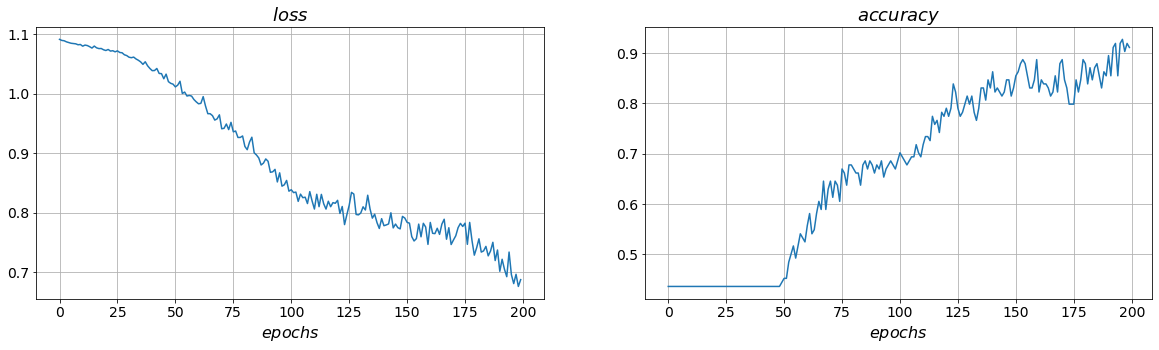

In [ ]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
# Test

output = model(x_test)
_, predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test),4)


print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.8704
